## Experiment on sales scheme

In [9]:
import matplotlib.pyplot as plt

### Connect to the database

In [10]:
%run connection.ipynb

Connecting with connection string : postgresql://postgres:letmein@db:5432/Adventureworks
 * postgresql://postgres:***@db:5432/Adventureworks
1 rows affected.
 * postgresql://postgres:***@db:5432/Adventureworks
1 rows affected.
 * postgresql://postgres:***@db:5432/Adventureworks
68 rows affected.


### What are the sales by month?

In [11]:
%%sql yearly_month_sales_df <<

WITH daily_sales AS (
    SELECT
        soh.orderdate,
        EXTRACT(year FROM soh.orderdate)::int AS year,
        EXTRACT(month FROM soh.orderdate)::int AS month,
        SUM(soh.subtotal)::int AS total
    FROM sales.salesorderheader soh
    GROUP BY 1
)

SELECT ds.year, ds.month, SUM(ds.total) AS total FROM daily_sales ds
GROUP BY 1,2
ORDER BY 1,2

 * postgresql://postgres:***@db:5432/Adventureworks
38 rows affected.
Returning data to local variable yearly_month_sales_df


In [12]:
yearly_month_sales_df

,year,month,total
0,2011,5,503806
1,2011,6,458913
2,2011,7,2044600
3,2011,8,2495818
4,2011,9,502074
5,2011,10,4588762
6,2011,11,737841
7,2011,12,1309864
8,2012,1,3970627
9,2012,2,1475428


/tmp/ipykernel_84872/2485619661.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])


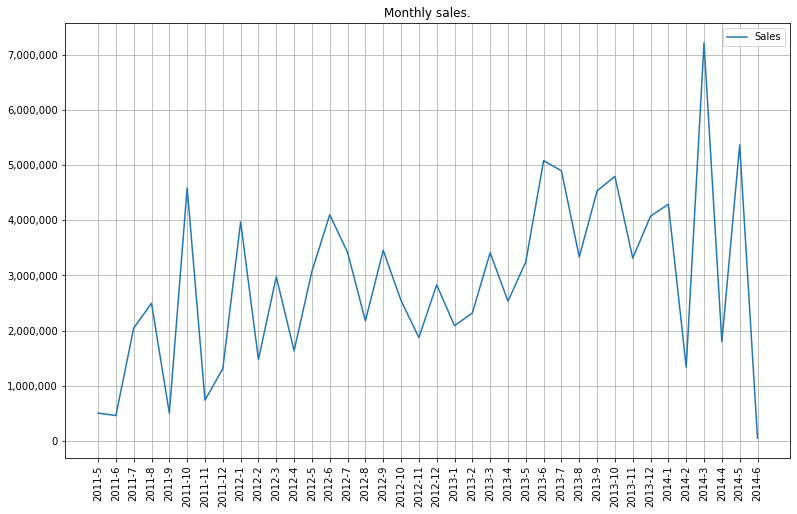

In [13]:
data = yearly_month_sales_df['total']
labels = yearly_month_sales_df[['year', 'month']].astype('str').agg('-'.join, axis=1)

fig, ax = plt.subplots(figsize=(13, 8))

ax.plot(labels, data, label='Sales')
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
ax.set_title('Monthly sales.')
ax.grid(True)
ax.legend()

plt.xticks(rotation=90)
plt.show()

### What are the sales by salesperson?

In [14]:
%%sql sales_by_sales_person <<

SELECT
    SUM(soh.totaldue) AS total,
    sp.businessentityid AS sales_person

FROM sales.salesorderheader soh
INNER JOIN sales.salesperson sp ON sp.businessentityid = soh.salespersonid

GROUP BY 2
ORDER BY 2



 * postgresql://postgres:***@db:5432/Adventureworks
17 rows affected.
Returning data to local variable sales_by_sales_person


In [15]:
sales_by_sales_person

,total,sales_person
0,1.235934e+06,274
1,1.047537e+07,275
2,1.169502e+07,276
3,1.134239e+07,277
4,4.069422e+06,278
5,8.086074e+06,279
6,3.748246e+06,280
7,7.259568e+06,281
8,6.683537e+06,282
9,4.207895e+06,283


/tmp/ipykernel_84872/1291263918.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


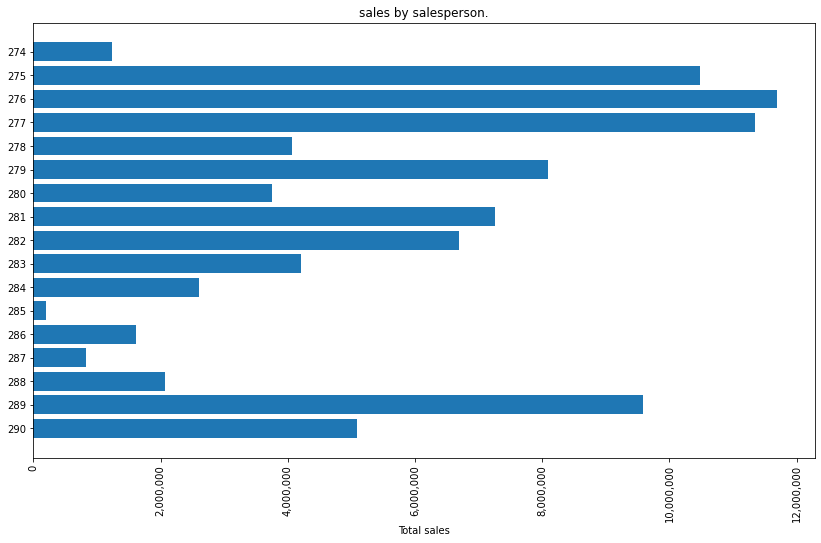

In [16]:
sales_people = sales_by_sales_person['sales_person']
total = sales_by_sales_person['total']

fig, ax = plt.subplots(figsize=(14, 8))

ax.barh(sales_people, total, align='center')
ax.set_yticks(sales_people)
ax.set_xticklabels(['{:,}'.format(int(x)) for x in ax.get_xticks().tolist()])
ax.invert_yaxis()
ax.set_xlabel('Total sales')
ax.set_title('sales by salesperson.')

plt.xticks(rotation=90)
plt.show()